TASK 4: Sales Prediction Using Advertising Costs

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
sales_df = pd.read_csv(r'C:\Users\Darshit\OneDrive\Desktop\CODSOFT\Task 4\advertising.csv')

In [3]:
def analysis(data):
    print(f'Advertising Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print("\nDisplaying the initial records of the dataset:")
    display(data.head())
    print("*" * 100)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    
data = sales_df
analysis(sales_df)

Advertising Data Size  : 800

Shape of the dataframe: 200 rows and 4 columns
****************************************************************************************************

Displaying the initial records of the dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


****************************************************************************************************

Statistical measures about the data:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


****************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

**************************************************************************************************************


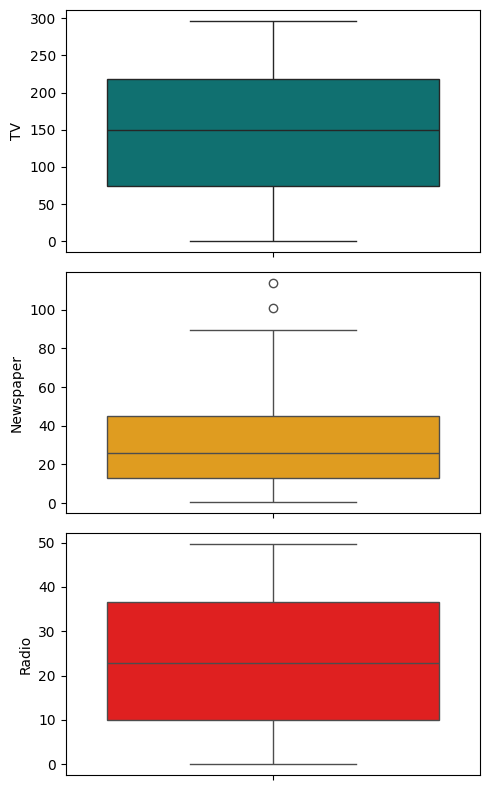

In [4]:
fig, axs = plt.subplots(3, figsize=(5, 8))
plt1 = sns.boxplot(sales_df['TV'], ax=axs[0], color='teal')
plt2 = sns.boxplot(sales_df['Newspaper'], ax=axs[1], color='orange')
plt3 = sns.boxplot(sales_df['Radio'], ax=axs[2], color='red')
plt.tight_layout()

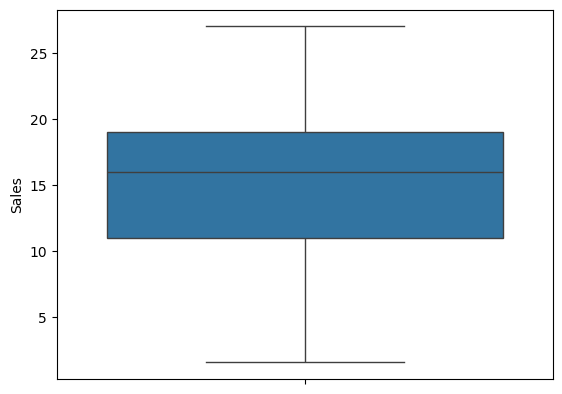

In [5]:
sns.boxplot(sales_df['Sales'])
plt.show()

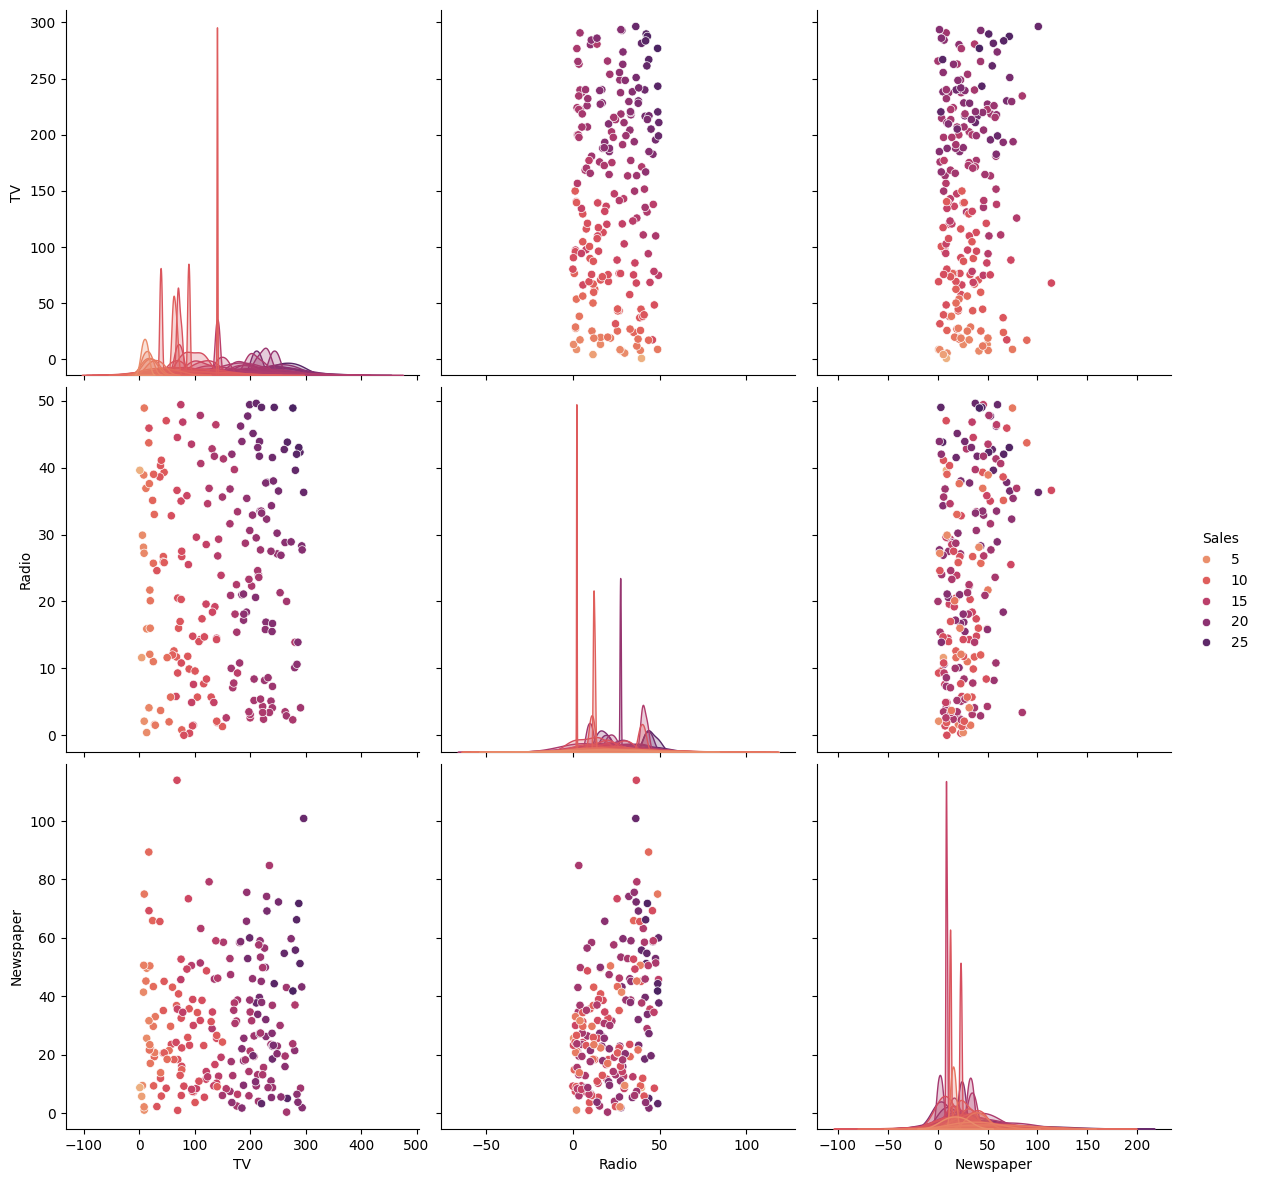

In [6]:
sns.pairplot(sales_df, kind = 'scatter', aspect = 1, height = 4, palette = 'flare', hue='Sales')

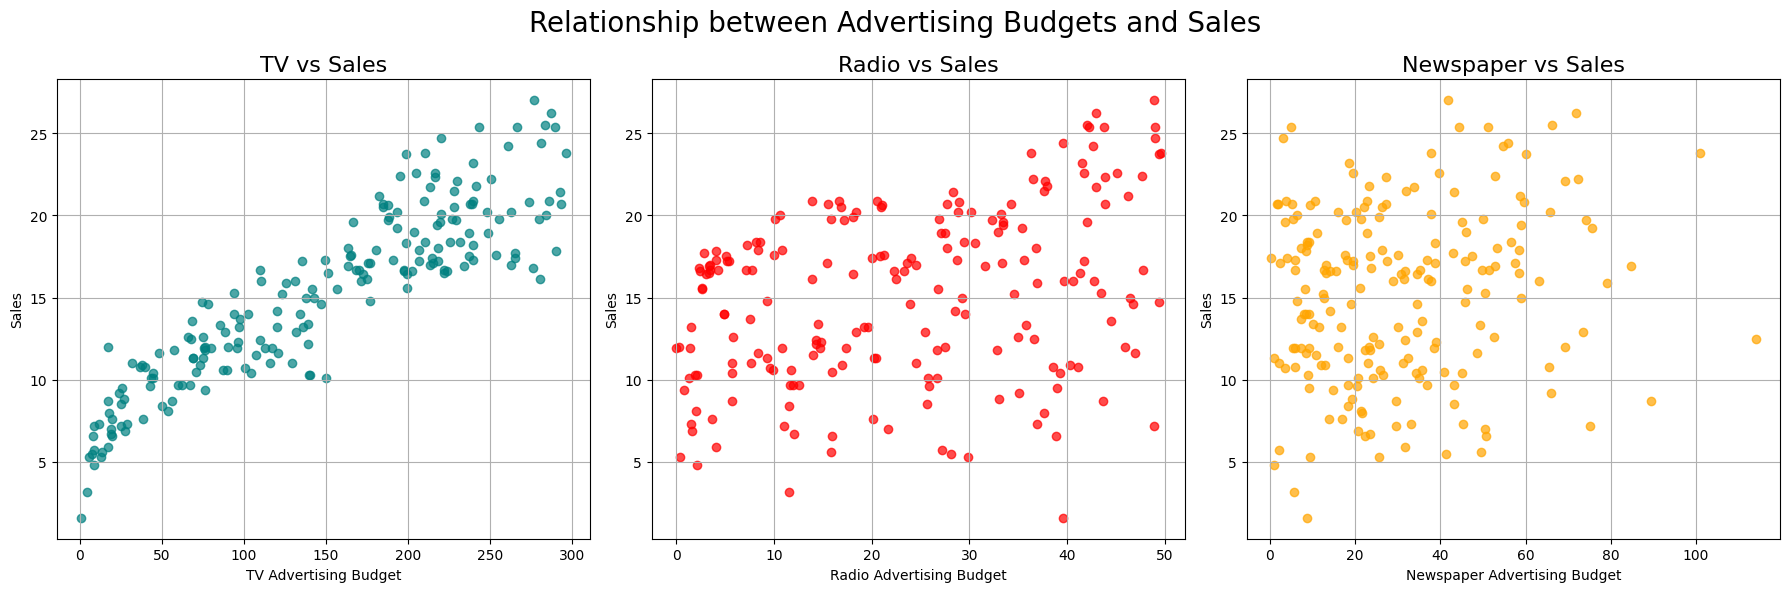

In [7]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(sales_df['TV'],sales_df['Sales'], alpha=0.7, color='teal')
plt.title('TV vs Sales', fontsize=16)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


plt.subplot(1,3,2)
plt.scatter(sales_df['Radio'],sales_df['Sales'], alpha=0.7, color='red')
plt.title('Radio vs Sales', fontsize=16)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


plt.subplot(1,3,3)
plt.scatter(sales_df['Newspaper'],sales_df['Sales'], alpha=0.7, color='orange')
plt.title('Newspaper vs Sales', fontsize=16)
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.suptitle('Relationship between Advertising Budgets and Sales', fontsize=20)

plt.tight_layout()
plt.show();

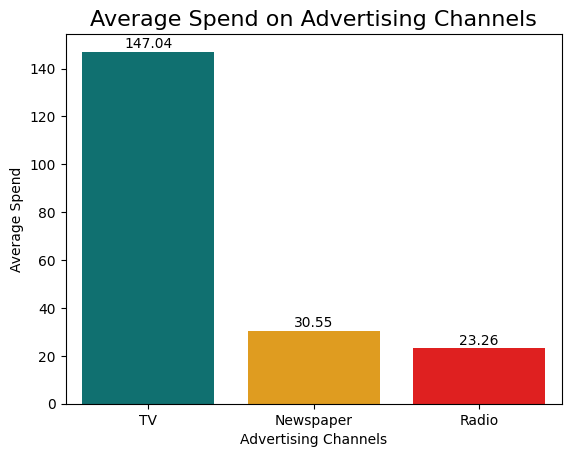

In [8]:
avg_spend = sales_df[['TV','Newspaper','Radio']].mean()

colors = ['teal','orange','red']

ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette=colors, linewidth=0)

for i, v in enumerate(avg_spend.values):
    ax.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')


plt.title('Average Spend on Advertising Channels', fontsize=16)
plt.xlabel('Advertising Channels', fontsize=10)
plt.ylabel('Average Spend', fontsize=10)
ax.yaxis.grid(False)
plt.show()

In [9]:
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


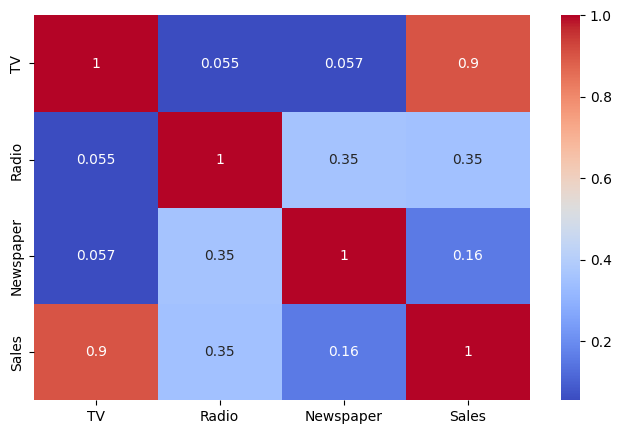

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(sales_df.corr(), cmap="coolwarm", annot = True)
plt.show()

In [11]:
print(f'\nMissing values in each column: \n{sales_df.isnull().sum()} ')
print(f'\nTotal missing values in the dataframe: {sales_df.isnull().sum().sum()} ')


Missing values in each column: 
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64 

Total missing values in the dataframe: 0 


In [12]:
for i in sales_df:
    print("No. of unique values in %s column are: %s" % (i, sales_df[i].nunique()))

No. of unique values in TV column are: 190
No. of unique values in Radio column are: 167
No. of unique values in Newspaper column are: 172
No. of unique values in Sales column are: 121


In [13]:
X = data[["TV", "Radio", "Newspaper"]]
y = data[['Sales']]

In [14]:
print(X.head())
print()
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

   Sales
0   22.1
1   10.4
2   12.0
3   16.5
4   17.9


In [15]:
print((X.shape), (y.shape))

(200, 3) (200, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [19]:
My_models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'Decision Tree Regression','Random Forest Regression', 'Gradient Boosting', 'XGBoost Regression', 'KNN Regression']

MSE_Score = []

In [20]:
linear = LinearRegression()
linear.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear.coef_[0][idx]))

The coefficient for TV is 0.05450927083721978
The coefficient for Radio is 0.10094536239295579
The coefficient for Newspaper is 0.0043366468220340446


In [21]:
intercept = linear.intercept_[0]
print("the intercept for our linear model is {}".format(intercept))

the intercept for our linear model is 4.714126402214127


In [22]:
y_pred_train_linear = linear.predict(X_train)
y_pred_test_linear = linear.predict(X_test)

In [23]:
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear)/100)
linear_mse = metrics.mean_squared_error(y_test, y_pred_test_linear)
print("Mean Square Error (MSE) :", linear_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_linear)))
r_squared_train_linear = r2_score(y_train, y_pred_train_linear)
r_squared_test_linear = r2_score(y_test, y_pred_test_linear)
print("R-squared Score (Train) :", r_squared_train_linear)
print("R-squared Score (Test) :", r_squared_test_linear)

MSE_Score.append(round(linear_mse,3))

Mean Absolute Error (MAE) : 1.2748262109549338
Mean Absolute Percent Error (MAPE) : 0.012748262109549338
Mean Square Error (MSE) : 2.9077569102710896
Root Mean Square Error (RMSE) : 1.7052146229349223
R-squared Score (Train) : 0.9001416005862131
R-squared Score (Test) : 0.9059011844150826


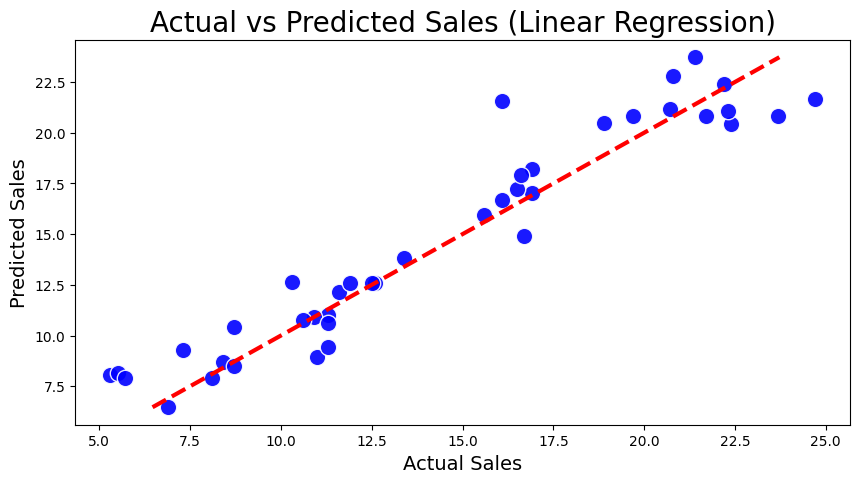

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_linear, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_linear), max(y_pred_test_linear)], [min(y_pred_test_linear), max(y_pred_test_linear)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Linear Regression)', fontsize=20);

In [25]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [0.05449934 0.10056182 0.00420248]


In [26]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [27]:
lasso.intercept_

array([4.72840816])

In [28]:
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_lasso))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_lasso)/100)
lasso_mse = metrics.mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Square Error (MSE) :", lasso_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_lasso))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_lasso))

MSE_Score.append(round(lasso_mse,3))

Mean Absolute Error (MAE) : 1.274175466196396
Mean Absolute Percent Error (MAPE) : 0.01274175466196396
Mean Square Error (MSE) : 2.9093222519953077
Root Mean Square Error (RMSE) : 1.705673547896932
R-squared Score (Train) : 0.9001396346012004
R-squared Score (Test) : 0.9058505279101615


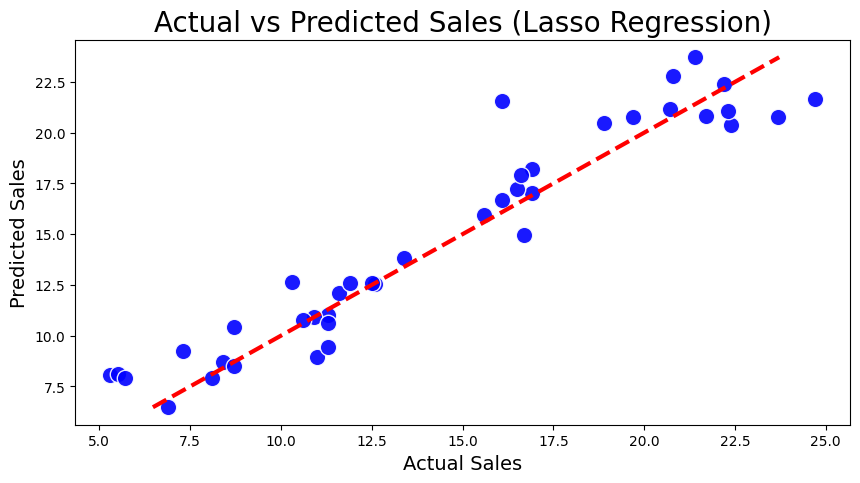

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_lasso, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_lasso), max(y_pred_test_lasso)], [min(y_pred_test_lasso), max(y_pred_test_lasso)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Lasso Regression)', fontsize=20);

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [0.05450926 0.10094435 0.00433691]


In [31]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [32]:
ridge.coef_

array([0.05450926, 0.10094435, 0.00433691])

In [33]:
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_ridge))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_ridge)/100)
ridge_mse = metrics.mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Square Error (MSE) :", ridge_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_ridge))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_ridge))

MSE_Score.append(round(ridge_mse,3))

Mean Absolute Error (MAE) : 1.2748273938014778
Mean Absolute Percent Error (MAPE) : 0.012748273938014778
Mean Square Error (MSE) : 2.907768669219757
Root Mean Square Error (RMSE) : 1.7052180708694582
R-squared Score (Train) : 0.9001416005791467
R-squared Score (Test) : 0.9059008038801286


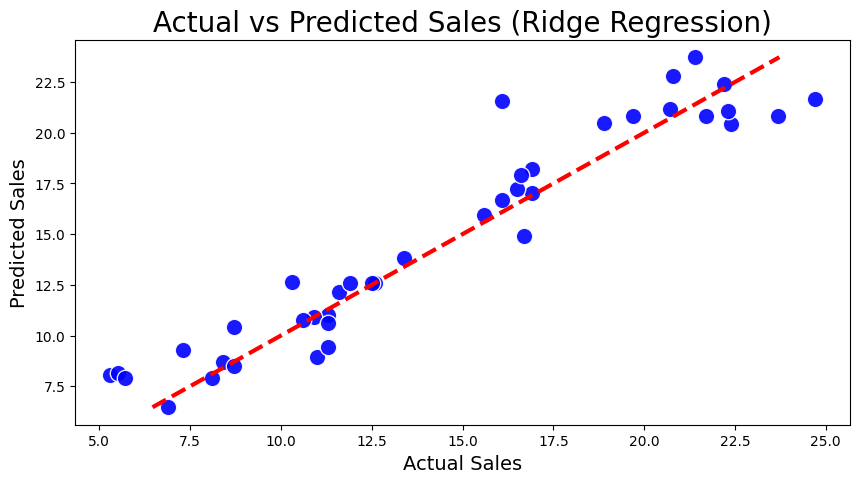

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_ridge, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_ridge), max(y_pred_test_ridge)], [min(y_pred_test_ridge), max(y_pred_test_ridge)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Ridge Regression)', fontsize=20);

In [35]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(X_train, y_train)

,alpha,0.3
,l1_ratio,0.1
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [36]:
y_pred_train_elastic = elastic.predict(X_train)
y_pred_test_elastic = elastic.predict(X_test)

In [37]:
elastic.coef_

array([0.05450536, 0.10068627, 0.00433431])

In [38]:
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_elastic))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_elastic)/100)
elastic_mse = metrics.mean_squared_error(y_test, y_pred_test_elastic)
print("Mean Square Error (MSE) :", elastic_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_elastic)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_elastic))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_elastic))

MSE_Score.append(round(elastic_mse,3))

Mean Absolute Error (MAE) : 1.2747994437791337
Mean Absolute Percent Error (MAPE) : 0.012747994437791337
Mean Square Error (MSE) : 2.909902936168489
Root Mean Square Error (RMSE) : 1.705843760773093
R-squared Score (Train) : 0.9001410405342483
R-squared Score (Test) : 0.9058317362110575


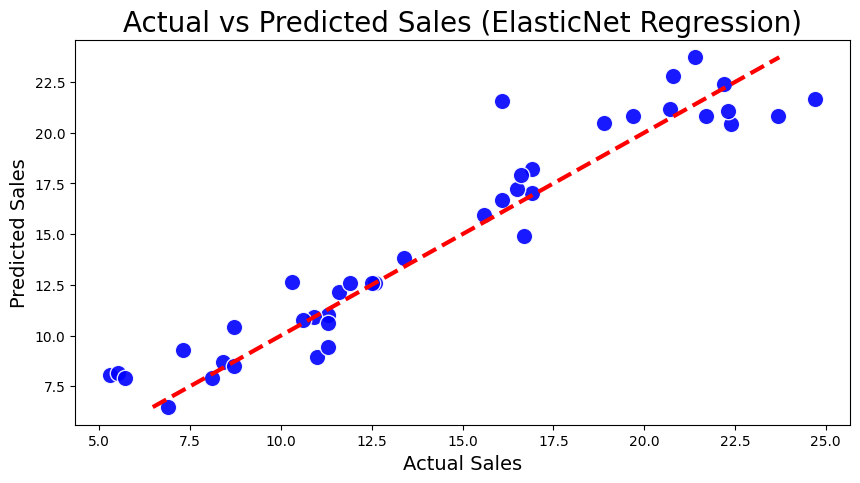

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_ridge, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_elastic), max(y_pred_test_elastic)], [min(y_pred_test_elastic), max(y_pred_test_elastic)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (ElasticNet Regression)', fontsize=20);

In [40]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

DTree_model = DecisionTreeRegressor(max_depth = 6)
DTree_model.fit(X_train, y_train)

RF_model = RandomForestRegressor(n_estimators = 500, random_state = 1, max_depth = 6)
RF_model.fit(X_train, y_train)

GDBoosting_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 123)
GDBoosting_model.fit(X_train, y_train)     

XGBoost_model = xgb.XGBRegressor(random_state = 111, max_depth = 2)
XGBoost_model.fit(X_train, y_train)

KNN_model = KNeighborsRegressor(n_neighbors = 5)
KNN_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
linear_test_prediction = linear_model.predict(X_test)
r2_score_linear = r2_score(y_test, linear_test_prediction)

DTree_test_prediction = DTree_model.predict(X_test)
r2_score_DTree = r2_score(y_test, DTree_test_prediction)

RF_test_prediction = RF_model.predict(X_test)
r2_score_RF = r2_score(y_test, RF_test_prediction)

GDBoosting_test_prediction = GDBoosting_model.predict(X_test)
r2_score_GDBoosting = r2_score(y_test, GDBoosting_test_prediction)

XGBoost_test_prediction = XGBoost_model.predict(X_test)
r2_score_XGBoost = r2_score(y_test, XGBoost_test_prediction)

KNN_test_prediction = KNN_model.predict(X_test)
r2_score_KNN = r2_score(y_test, KNN_test_prediction)

In [42]:
regressor_scores = [
    ("Linear Regression", r2_score_linear),
    ("Decision Tree Regressor", r2_score_DTree),
    ("Random Forest Regressor", r2_score_RF),
    ("Gradient Boosting Regressor", r2_score_GDBoosting),
    ("XGBoost Regressor", r2_score_XGBoost),
    ("KNN Regressor", r2_score_KNN),
]

sorted_regressor_scores = sorted(regressor_scores, reverse=True, key=lambda x: x[1])

for regressor, score in sorted_regressor_scores:
    print(f"{regressor}\n R-squared score: {score}\n")

Gradient Boosting Regressor
 R-squared score: 0.959697246280149

Random Forest Regressor
 R-squared score: 0.9515967014242255

XGBoost Regressor
 R-squared score: 0.9391695261001587

Linear Regression
 R-squared score: 0.9059011844150826

Decision Tree Regressor
 R-squared score: 0.9025667239383062

KNN Regressor
 R-squared score: 0.8991773755626823



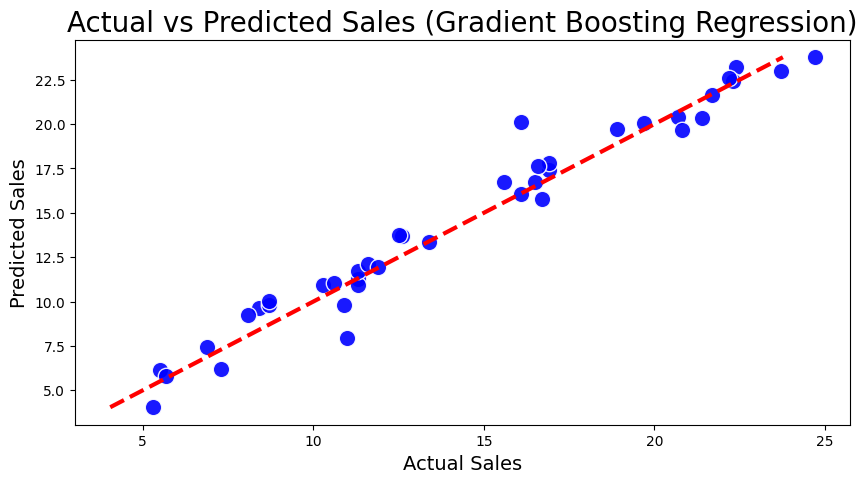

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, GDBoosting_test_prediction, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(GDBoosting_test_prediction), max(GDBoosting_test_prediction)], [min(GDBoosting_test_prediction), max(GDBoosting_test_prediction)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Gradient Boosting Regression)', fontsize=20);

In [44]:
DecisionTree_mse = metrics.mean_squared_error(y_test, DTree_test_prediction)
MSE_Score.append(round(DecisionTree_mse,3))

RandomForest_mse = metrics.mean_squared_error(y_test, RF_test_prediction)
MSE_Score.append(round(RandomForest_mse,3))

GDBoosting_mse = metrics.mean_squared_error(y_test, GDBoosting_test_prediction)
MSE_Score.append(round(GDBoosting_mse,3))

XGBoost_mse = metrics.mean_squared_error(y_test, XGBoost_test_prediction)
MSE_Score.append(round(XGBoost_mse,3))

KNN_mse = metrics.mean_squared_error(y_test, KNN_test_prediction)
MSE_Score.append(round(KNN_mse,3))

In [45]:
final_MSE = pd.DataFrame()
final_MSE.index = My_models
final_MSE['MSE'] = MSE_Score

final_MSE.sort_values(by="MSE", ascending=False)

,MSE
KNN Regression,3.116
Decision Tree Regression,3.011
ElasticNet Regression,2.910
Lasso Regression,2.909
Linear Regression,2.908
Ridge Regression,2.908
XGBoost Regression,1.880
Random Forest Regression,1.496
Gradient Boosting,1.245


In [46]:
TV = int(input('Enter the amount spent on TV Advertising: '))
Radio = int(input('Enter the amount spent on Radio Advertising: '))
Newspaper = float(input('Enter the amount spent on Newspaper Advertising: '))

Enter the amount spent on TV Advertising:  180
Enter the amount spent on Radio Advertising:  49
Enter the amount spent on Newspaper Advertising:  23.4


In [47]:
input_list = [TV, Radio, Newspaper]
input_list

Sales_Prediction = GDBoosting_model.predict([input_list])
print(f'The predicted Sales based on the given advertising expenditures is {Sales_Prediction[0]:,.2f}, the model has an associated Mean Squared Error of {GDBoosting_mse:.3f}.')

The predicted Sales based on the given advertising expenditures is 21.19, the model has an associated Mean Squared Error of 1.245.


In [48]:
final_result = pd.DataFrame(GDBoosting_model.predict(X))
final_result = final_result.rename(columns = {0 : "Sales_Predicted"})
final_result

,Sales_Predicted
0,22.171203
1,10.797260
2,11.189745
3,16.977519
4,17.927487
...,...
195,7.960206
196,13.349888
197,15.814860
198,25.761561


In [49]:
final_model = pd.concat([sales_df, pd.DataFrame(final_result)], axis = 1)
final_model

,TV,Radio,Newspaper,Sales,Sales_Predicted
0,230.1,37.8,69.2,22.1,22.171203
1,44.5,39.3,45.1,10.4,10.797260
2,17.2,45.9,69.3,12.0,11.189745
3,151.5,41.3,58.5,16.5,16.977519
4,180.8,10.8,58.4,17.9,17.927487
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,7.960206
196,94.2,4.9,8.1,14.0,13.349888
197,177.0,9.3,6.4,14.8,15.814860
198,283.6,42.0,66.2,25.5,25.761561


In [50]:
final_model.to_csv(r"C:\Users\Darshit\OneDrive\Desktop\CODSOFT\Task 4\Sales_Prediction.csv")

In [51]:
print("Final Accuracy Score:",r2_score(final_model['Sales'], final_model['Sales_Predicted']))
print("Final Mean Squared Error:",metrics.mean_squared_error(final_model['Sales'], final_model['Sales_Predicted']))

Final Accuracy Score: 0.9857950585569059
Final Mean Squared Error: 0.3946121333426059
